In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import os
import zipfile

# Define the path to your downloaded dataset
dataset_path = "/content/drive/MyDrive/ML Road sign detection model/archive (1).zip"  # Update this path
data_dir = "data"
annotations_dir = os.path.join(data_dir, "annotations")
labels_dir = os.path.join(data_dir, "labels")

# Unzip the dataset
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

# Rename the 'annotations' directory to 'labels'
os.rename(annotations_dir, labels_dir)

In [4]:
# Clone the repository and install requirements
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15943, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 15943 (delta 28), reused 39 (delta 16), pack-reused 15880
Receiving objects: 100% (15943/15943), 14.61 MiB | 18.00 MiB/s, done.
Resolving deltas: 100% (10927/10927), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.6/188.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.3/614.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00


In [5]:
!pip install preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.6/349.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.6 MB/s eta 0:00:00
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367708 sha256=7449adb76f9e46d09a8477b6d0a8b7ef4fc0bbd356850fc78f9b026c61836fac
  Stored in directory: /root/.cache/pip/wheels/0e/8c/42/bcd0934b61ecf4cef964ccc9881888cca0841ec72266e99de1
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [22]:
import os
import xml.etree.ElementTree as ET

def convert_box(size, box):
    dw, dh = 1. / size[0], 1. / size[1]
    x, y, w, h = (box[0] + box[1]) / 2.0 - 1, (box[2] + box[3]) / 2.0 - 1, box[1] - box[0], box[3] - box[2]
    return x * dw, y * dh, w * dw, h * dh

def convert_voc_to_yolo():
    for anno in os.listdir('./data/labels'):
        if anno.split('.')[1] == 'xml':
            file_name = anno.split('.')[0]
            out_file = open(f'./data/labels/{file_name}.txt', 'w')

            tree = ET.parse(os.path.join('data','labels', anno))
            root = tree.getroot()
            size = root.find('size')
            w = int(size.find('width').text)
            h = int(size.find('height').text)

            names = ['trafficlight', 'speedlimit', 'crosswalk', 'stop']

            for obj in root.iter('object'):
                cls = obj.find('name').text
                if cls in names and int(obj.find('difficult').text) != 1:
                    xmlbox = obj.find('bndbox')
                    bb = convert_box((w, h), [float(xmlbox.find(x).text) for x in ('xmin', 'xmax', 'ymin', 'ymax')])
                    cls_id = names.index(cls)  # class id
                    out_file.write(" ".join([str(a) for a in (cls_id, *bb)]) + '\n')

In [16]:
!pip install preprocessing

In [23]:
convert_voc_to_yolo()

# New Section

In [24]:
import shutil

source_path = r'/content/yolov5/data/VOC.yaml'
destination_path = r'/content/yolov5/VOC.yaml'

try:
    shutil.copy(source_path, destination_path)
    print(f"File '{source_path}' copied to '{destination_path}' successfully.")
except Exception as e:
    print(f"Error: {e}")

File '/content/yolov5/data/VOC.yaml' copied to '/content/yolov5/VOC.yaml' successfully.


In [25]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os

In [28]:
!cd /content/yolov5 && python train.py --img 320 --batch 8 --epochs 50 --data VOC.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=VOC.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-215-ga6659d0 Python-3.10.12 torch-2.0.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, 

In [31]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/ML Road sign detection model/yolov5/runs/train/exp5/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-9-7 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


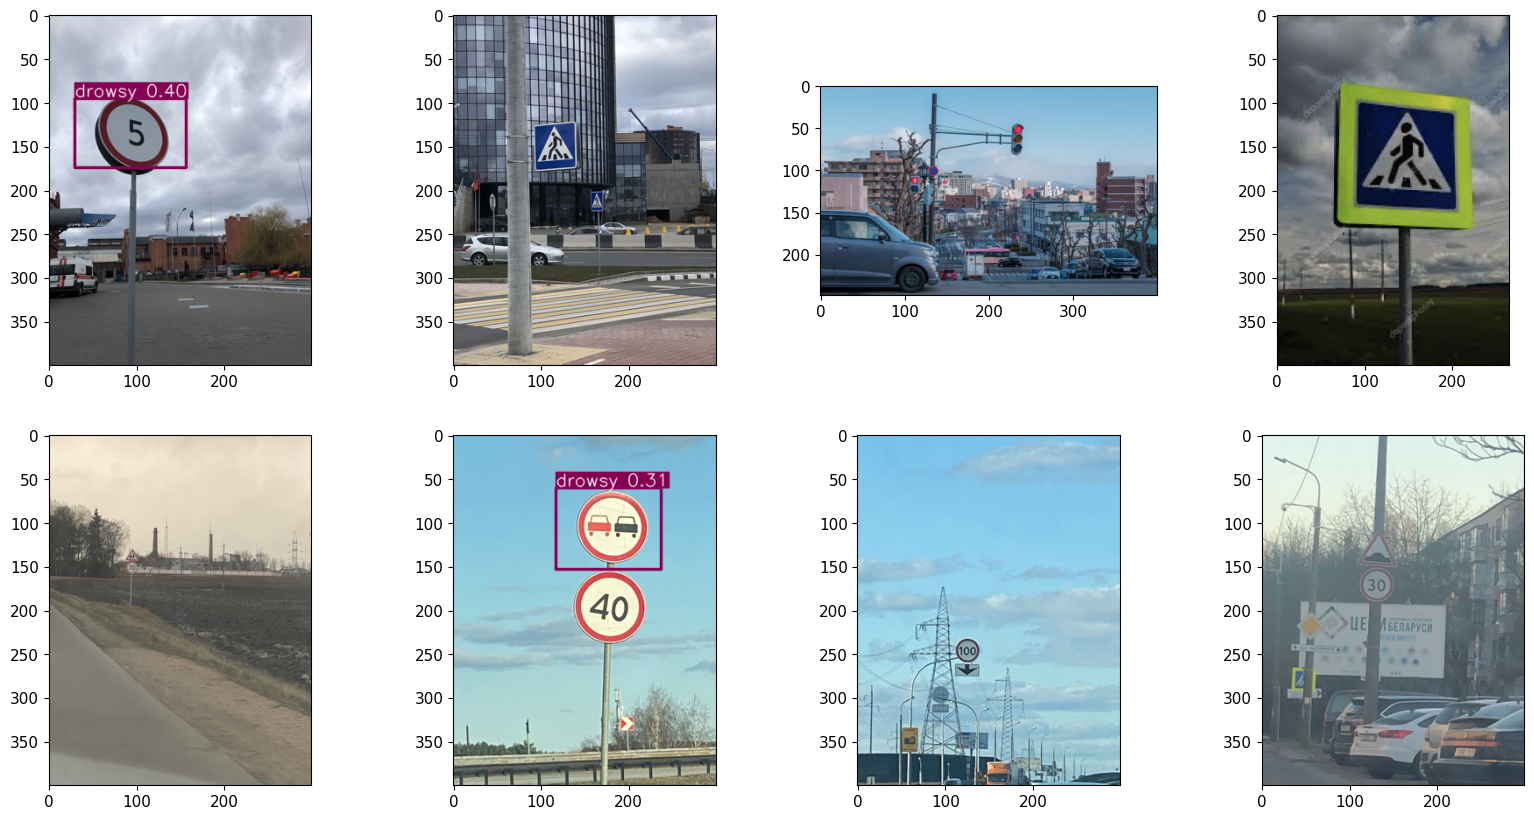

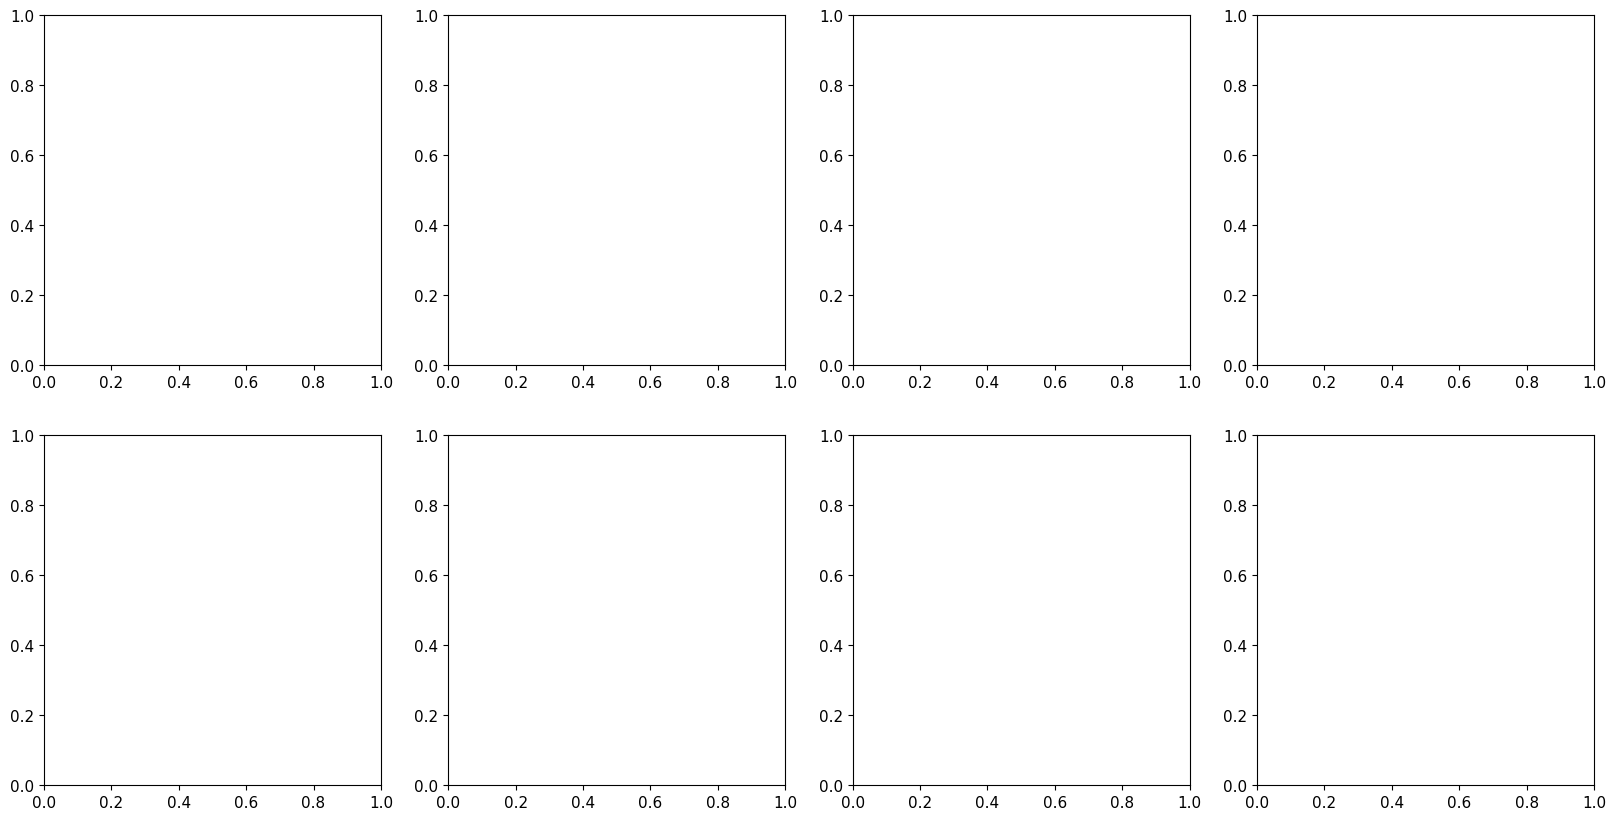

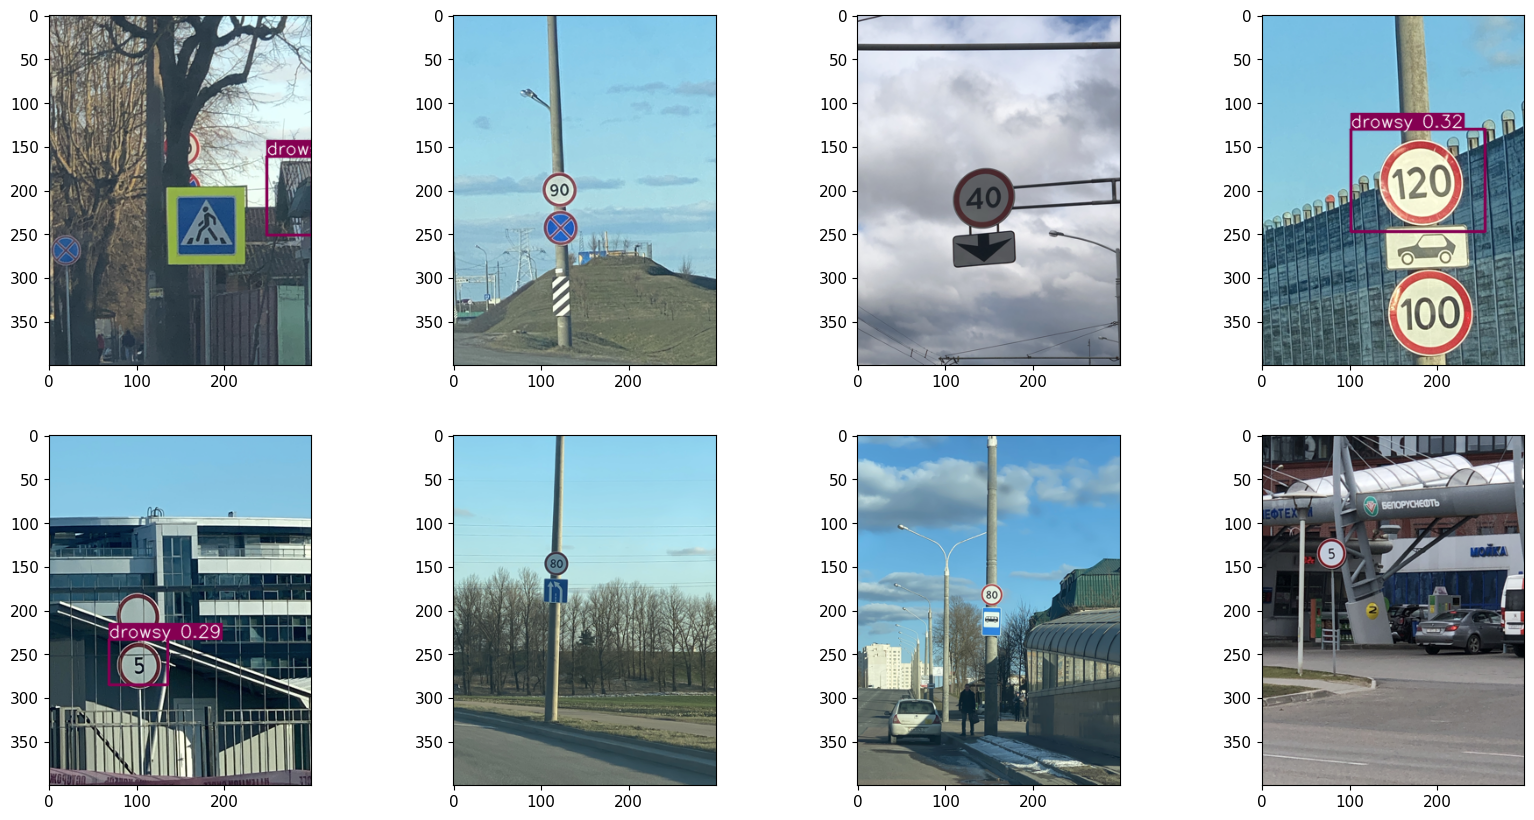

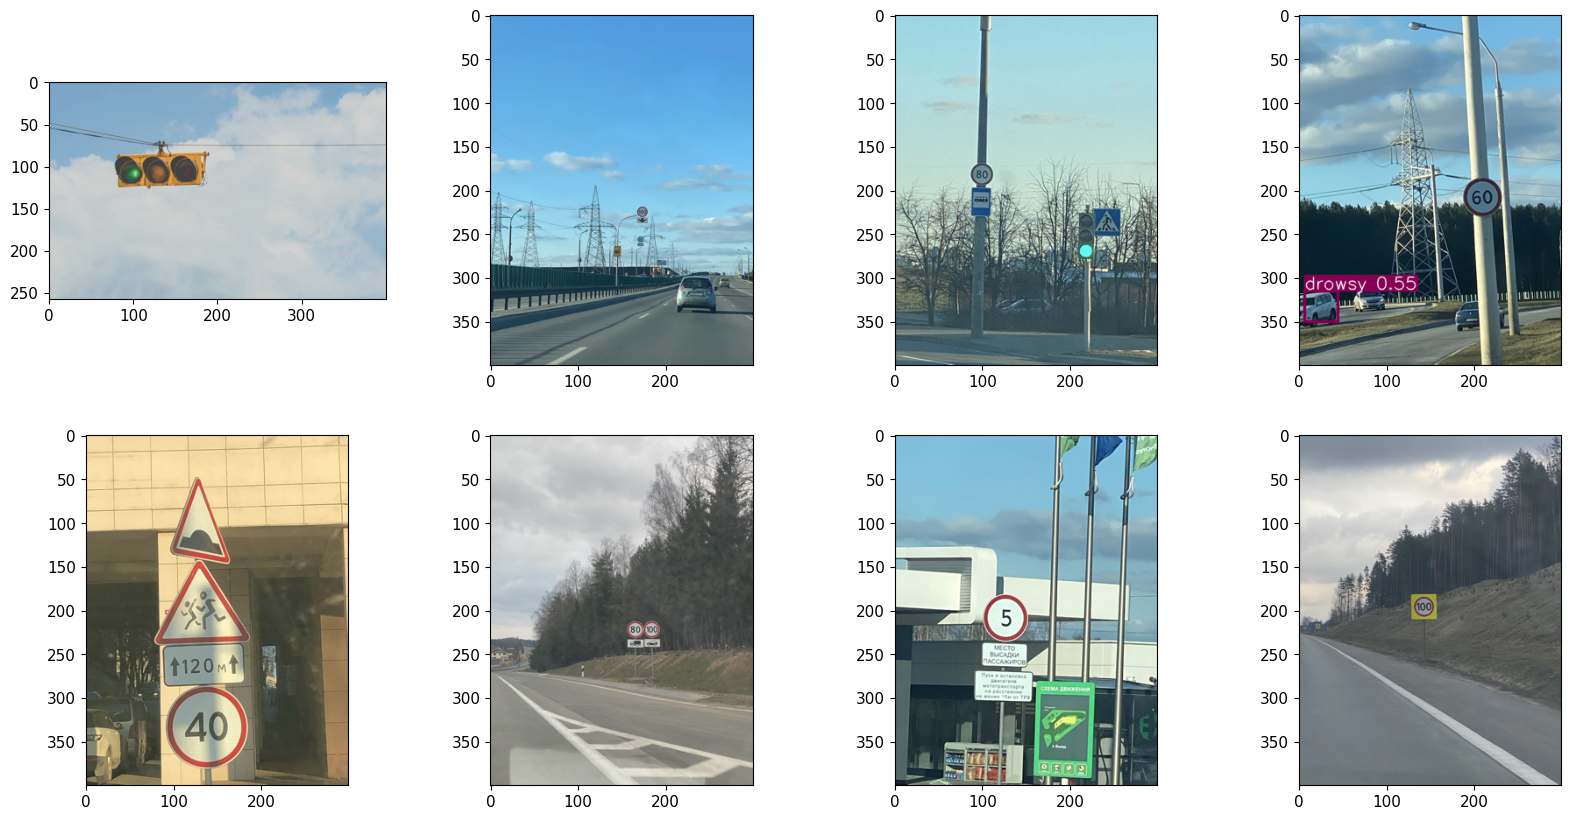

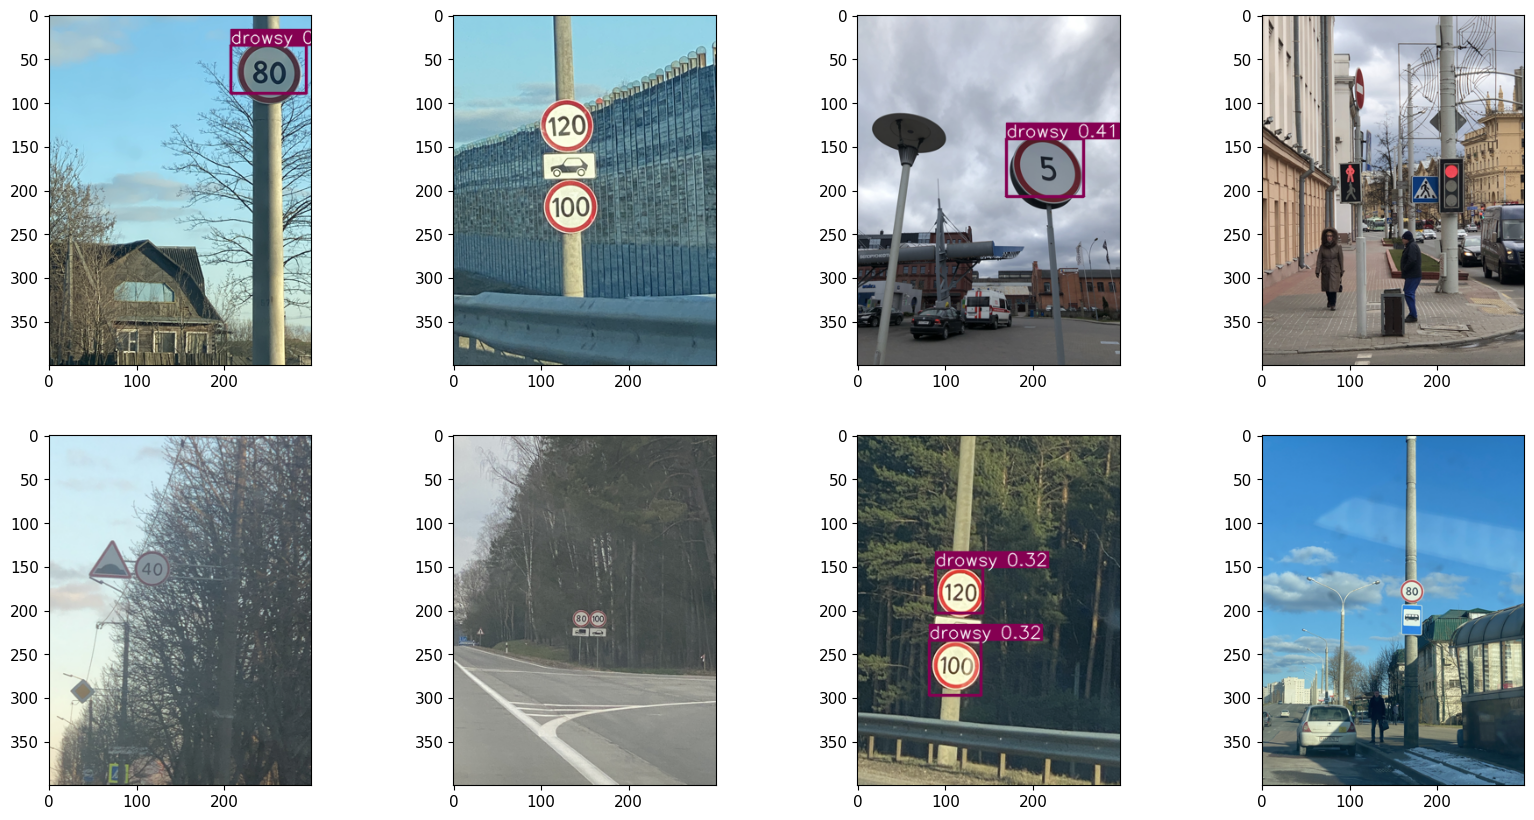

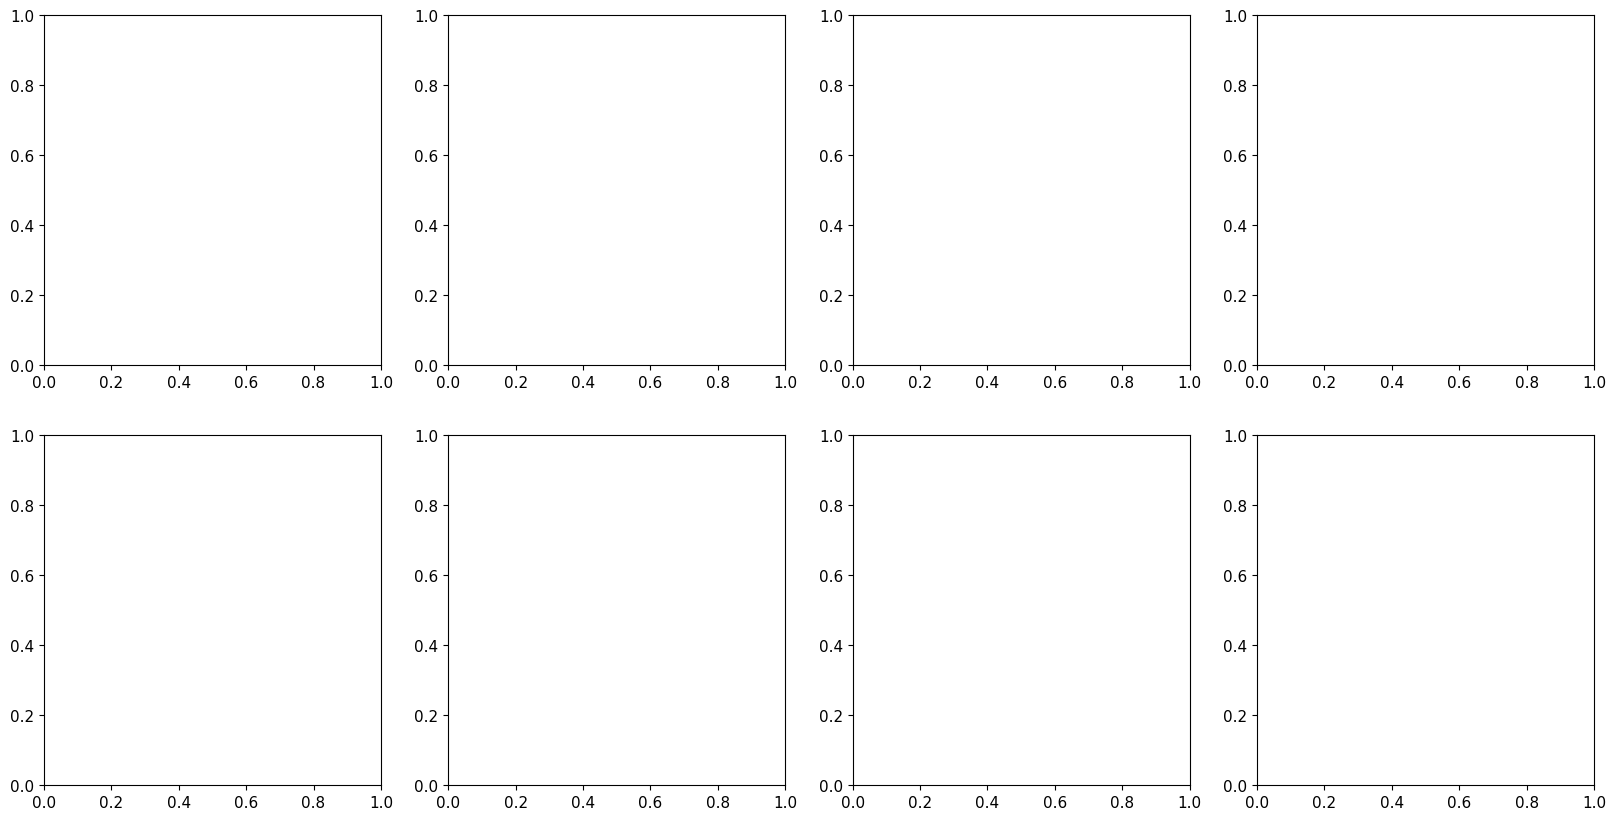

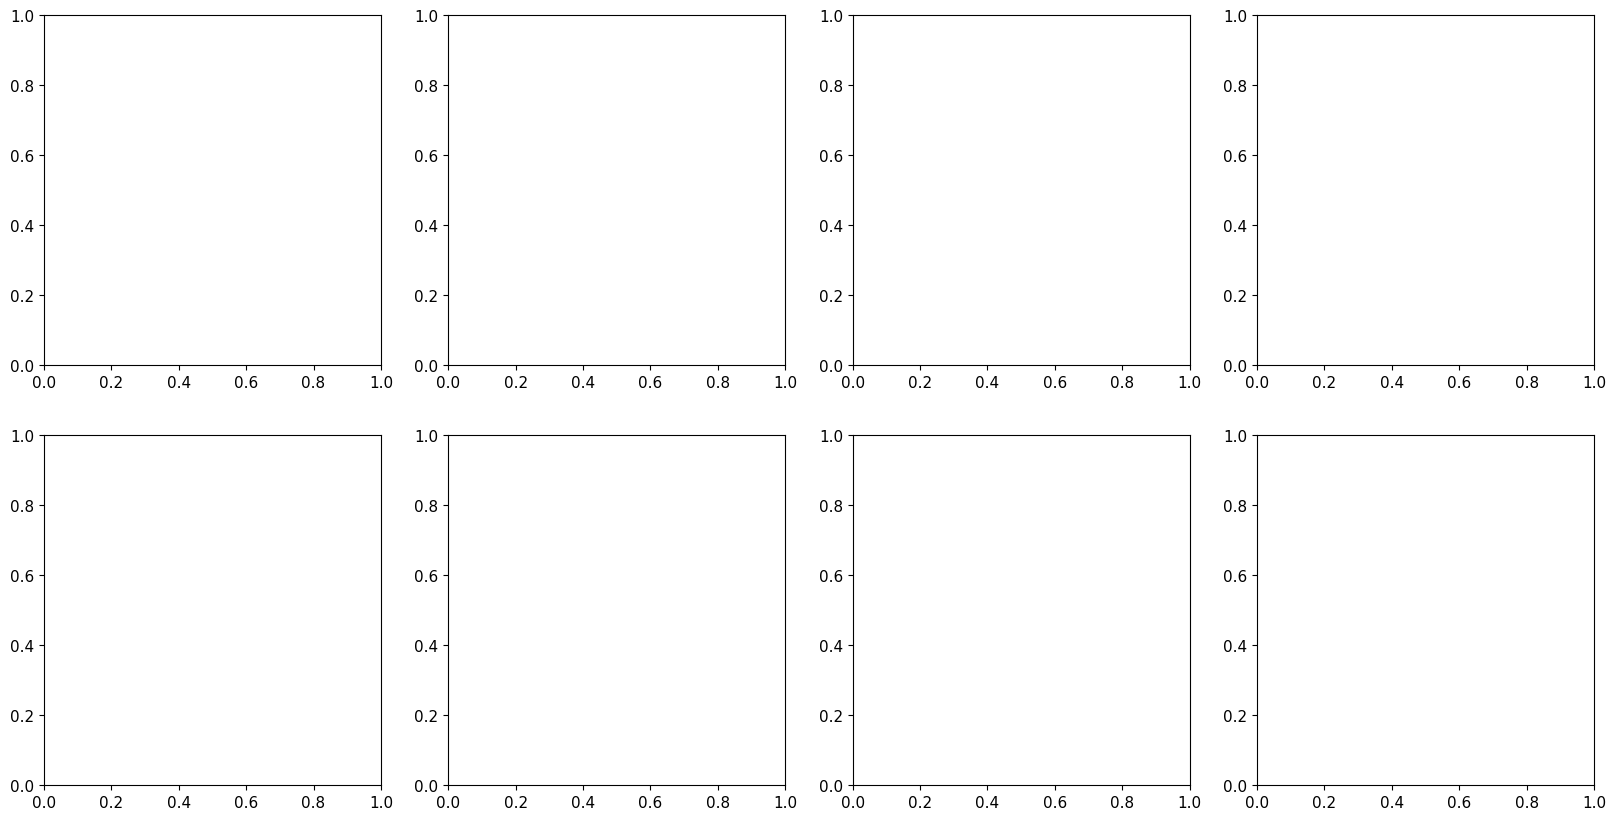

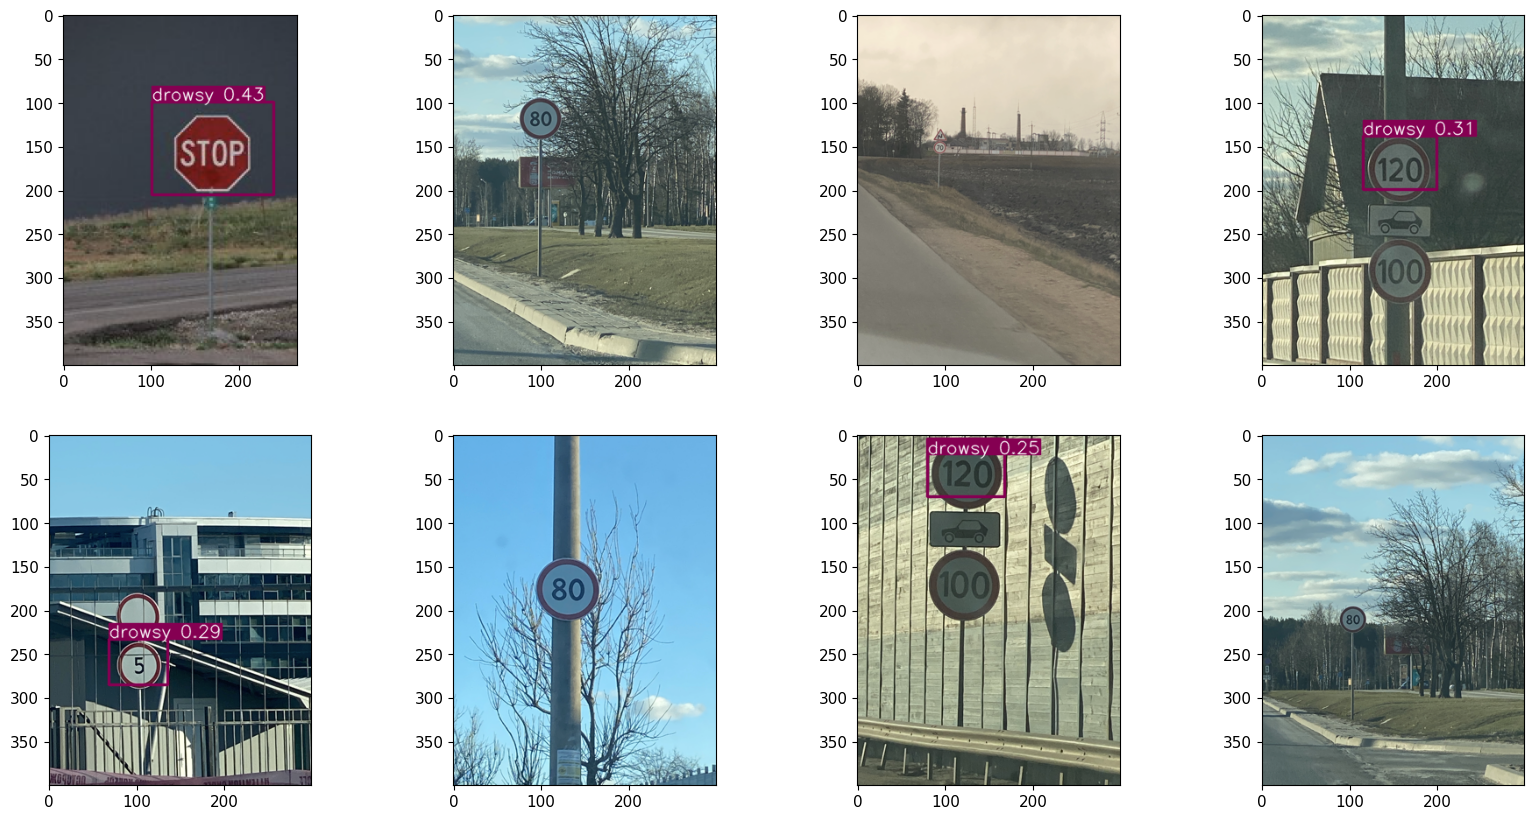

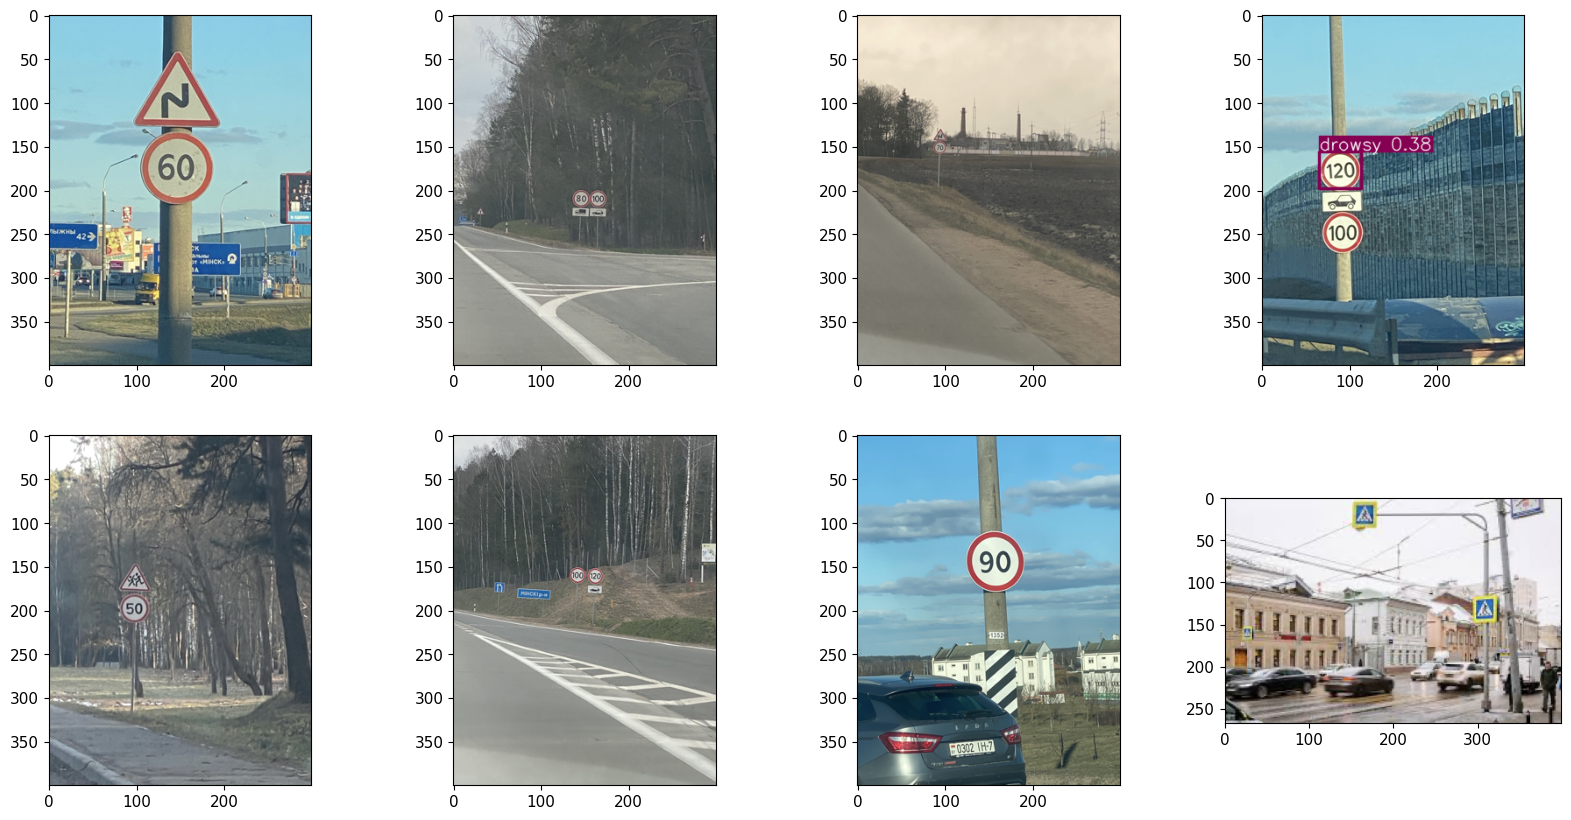

In [45]:
import os
import itertools
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image directory
image_dir = '/content/data/images'
imgs = os.listdir(image_dir)

# Check if there are any images in the directory
if not imgs:
    print("No images found in the directory:", image_dir)
else:
    fig, ax = plt.subplots(2, 4, figsize=(20, 10))

    for idx in itertools.product(range(2), range(4)):
        # Choose a random image from the directory
        imgname = np.random.choice(imgs)
        img_path = os.path.join(image_dir, imgname)

        # Load the image using cv2.imread
        img = cv2.imread(img_path)

        # Check if img is None (indicating an error in loading)
        if img is not None:
            # Process the image with your model
            results = model(img)

            # Display the image
            ax[idx[0], idx[1]].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))
        else:
            print(f"Error loading image: {img_path}")

plt.show()